In [1]:
import torch
from utils import load_checkpoint
import torch.optim as optim
import config
from discriminator import Discriminator
from generator import Generator
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
d_real = Discriminator(in_channels=3).to(config.DEVICE)
g_real = Generator(in_channels=3, num_residuals=9).to(config.DEVICE)

d_style = Discriminator(in_channels=3).to(config.DEVICE)
g_style = Generator(in_channels=3, num_residuals=9).to(config.DEVICE)

d_optim = optim.Adam(list(d_style.parameters()) + list(d_real.parameters()), lr=config.LR, betas=(0.5, 0.999))
g_optim = optim.Adam(list(g_style.parameters()) + list(g_real.parameters()), lr=config.LR, betas=(0.5, 0.999))

load_checkpoint("checkpoints/" + config.CHECKPOINT_G_STYLE, g_style, g_optim)
load_checkpoint("checkpoints/" + config.CHECKPOINT_G_REAL, g_real, g_optim)
load_checkpoint("checkpoints/" + config.CHECKPOINT_CRITIC_STYLE, d_style, d_optim)
load_checkpoint("checkpoints/" + config.CHECKPOINT_CRITIC_REAL, d_real, d_optim)

Loading checkpoint...
Loading checkpoint...
Loading checkpoint...
Loading checkpoint...


In [3]:
def generate_images(generator, num_images=4, real=False):
    generator.eval()
    with torch.no_grad():
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
        for i in range(num_images):
            if real:
                image_path = f"data/train/real/40{i}.jpg"
                image = Image.open(image_path).convert("RGB")
                input_tensor = config.transform(image).unsqueeze(0).to(config.DEVICE)
            else:
                image_path = f"data/train/ghibli/{i + 1}.jpg"
                image = Image.open(image_path).convert("RGB")
                input_tensor = config.transform(image).unsqueeze(0).to(config.DEVICE)

            with torch.no_grad():
                generator.eval()
                output = g_style(input_tensor)

            output_image = output.squeeze(0).cpu().detach()
            output_image = output_image * 0.5 + 0.5

            output_image_pil = transforms.ToPILImage()(output_image)
            axes[i].imshow(output_image_pil)
            axes[i].axis("off")
        plt.show()

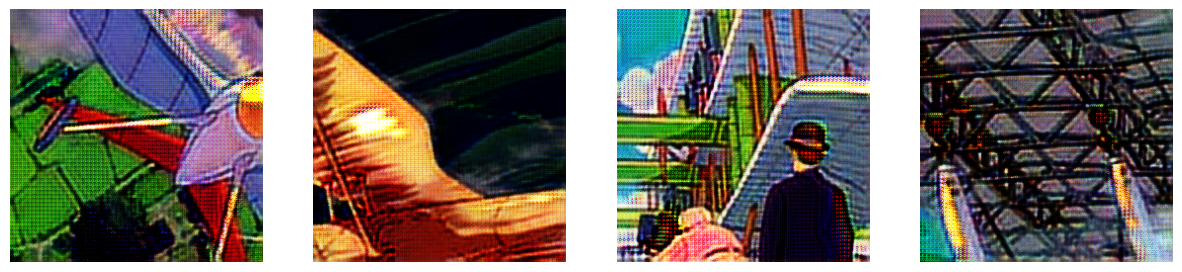

In [4]:
generate_images(g_style, num_images=4)

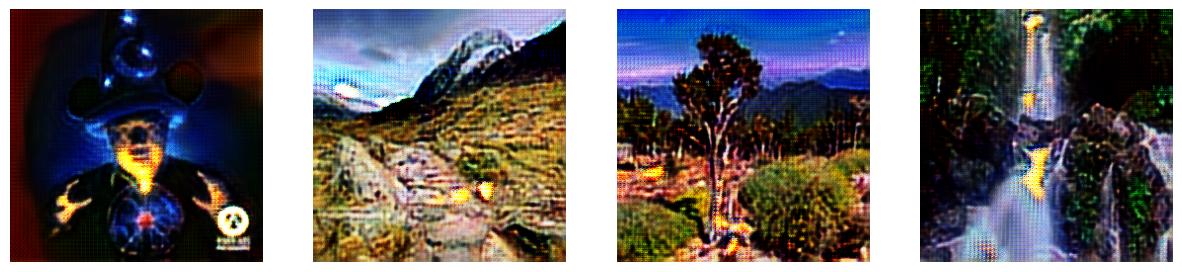

In [5]:
generate_images(g_style, num_images=4, real=True)